

for n= 2
Working on feature set: 784 * 10088 ! wait....
Reduced set: (784, 150)
     Model  Fitting time   Accuracy  Precision     Recall   F1_score   AUC_ROC
0       LR      0.035479  97.115722  96.271973  95.235033  97.085838  0.992273
1    DTree      0.043181  94.897721  93.391390  91.456688  94.853312  0.947914
2      SVM      0.077054  95.248393  93.543947  92.627731  95.199450  0.973099
3       RF      0.074281  97.624196  97.625014  95.253149  97.571877  0.993708
4     K-NN      0.140385  96.607247  94.701847  95.226168  96.606727  0.982149
5    Bayes      0.001401  84.009351  77.216356  83.663482  84.865187  0.939421
6  XGBoost      0.493791  97.112800  96.446404  94.895011  97.045233  0.991466
7  AdBoost      0.237155  97.454705  97.500429  94.804431  97.358422  0.994794


for n= 3
Working on feature set: 784 * 23832 ! wait....
Reduced set: (784, 150)
     Model  Fitting time   Accuracy  Precision     Recall   F1_score   AUC_ROC
0       LR      0.015060  97.618352  97.650393

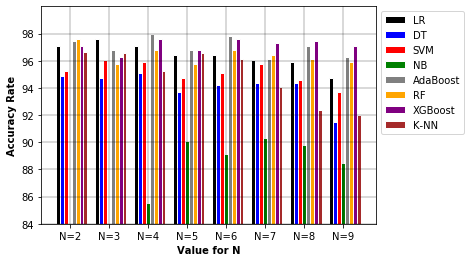

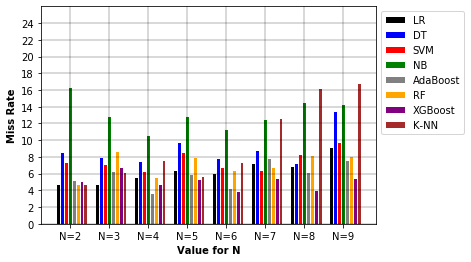

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import numpy as np
from numpy import array
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import cross_validate,KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD,SparsePCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection,preprocessing
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
a=[]
b=[]
c=[]
e=[]
g=[]
h=[]
j=[]
v=[]
a1=[]
b1=[]
c1=[]
e1=[]
g1=[]
h1=[]
j1=[]
v1=[]

d =pd.read_csv(r'C:\Users\harip25\Desktop\Data\chamcha.csv',names=['Status','message'],encoding='latin-1')   #opening csv dataset into 'd' and just naming our columns,encoding needed for textual data(not necessary):
X=d["message"]
y=d["Status"]
le=preprocessing.LabelEncoder()         #just a labeling for malicious and non-maliciousApi calls (column 1) as either 0 and 1 (if not done in dataset)
y=le.fit_transform(y)

#preprocessing data:
y=y.astype(int)
for i in range (2,10):  #loop for 'n' gram values
    models_initial=[0];
    print("\n\nfor n=",i)
    f= TfidfVectorizer(ngram_range=(i,i))    #vectorization of APi call sequences according to n-grams in TF-IDF
    X = f.fit_transform(d["message"])
    row,col=X.shape
    print("Working on feature set:",row,"*",col,"! wait....")

    svd = TruncatedSVD(n_components=150,algorithm='randomized', random_state=42)
    svd.fit(X)
    data = svd.fit_transform(X)     
    print("Reduced set:",data.shape)
            
    #splitting dataset into test and train
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data,y, test_size=0.25)

    #logistic regression
    LR = LogisticRegression(C=100,penalty='l2',intercept_scaling=1)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    LR_fit_time = scores['fit_time'].mean()
    LR_score_time = scores['score_time'].mean()
    LR_accuracy = 100*scores['test_accuracy'].mean()
    a.append(100*scores['test_accuracy'].mean())
    a1.append(100-100*scores['test_recall_macro'].mean())
    LR_precision = 100*scores['test_precision_macro'].mean()
    LR_recall = 100*scores['test_recall_macro'].mean()
    LR_f1 = 100*scores['test_f1_weighted'].mean()
    LR_roc = scores['test_roc_auc'].mean()

    #decision tree
    decision_tree = DecisionTreeClassifier(criterion='gini',splitter="best",min_samples_split=25,random_state=0)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    dtree_fit_time = scores['fit_time'].mean()
    dtree_score_time = scores['score_time'].mean()
    dtree_accuracy = 100*scores['test_accuracy'].mean()
    b.append(100*scores['test_accuracy'].mean())
    b1.append(100-100*scores['test_recall_macro'].mean())
    dtree_precision = 100*scores['test_precision_macro'].mean()
    dtree_recall = 100*scores['test_recall_macro'].mean()
    dtree_f1 = 100*scores['test_f1_weighted'].mean()
    dtree_roc = scores['test_roc_auc'].mean()

    #SVM
    SVM = SVC(kernel='linear', C=100, gamma=10,probability = True)
    scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    SVM_fit_time = scores['fit_time'].mean()
    SVM_score_time = scores['score_time'].mean()
    SVM_accuracy = 100*scores['test_accuracy'].mean()
    c.append(100*scores['test_accuracy'].mean())
    c1.append(100-100*scores['test_recall_macro'].mean())
    SVM_precision = 100*scores['test_precision_macro'].mean()
    SVM_recall = 100*scores['test_recall_macro'].mean()
    SVM_f1 = 100*scores['test_f1_weighted'].mean()
    SVM_roc = scores['test_roc_auc'].mean()
   
    #random forest
    random_forest = RandomForestClassifier(n_estimators=25,oob_score=True,min_samples_leaf = 5)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    forest_fit_time = scores['fit_time'].mean()
    forest_score_time = scores['score_time'].mean()
    forest_accuracy = 100*scores['test_accuracy'].mean()
    h.append(100*scores['test_accuracy'].mean())
    h1.append(100-100*scores['test_recall_macro'].mean())
    forest_precision = 100*scores['test_precision_macro'].mean()
    forest_recall = 100*scores['test_recall_macro'].mean()
    forest_f1 = 100*scores['test_f1_weighted'].mean()
    forest_roc = scores['test_roc_auc'].mean()

    #KNN
    KNN = KNeighborsClassifier(algorithm='ball_tree', metric='minkowski', n_neighbors=5,weights='uniform')
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    KNN_fit_time = scores['fit_time'].mean()
    KNN_score_time = scores['score_time'].mean()
    KNN_accuracy = 100*scores['test_accuracy'].mean()
    j.append(100*scores['test_accuracy'].mean())
    j1.append(100-100*scores['test_recall_macro'].mean())
    KNN_precision = 100*scores['test_precision_macro'].mean()
    KNN_recall = 100*scores['test_recall_macro'].mean()
    KNN_f1 = 100*scores['test_f1_weighted'].mean()
    KNN_roc = scores['test_roc_auc'].mean()
  

    #NB
    bayes = BernoulliNB(binarize=0.07)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    bayes_fit_time = scores['fit_time'].mean()
    bayes_score_time = scores['score_time'].mean()
    bayes_accuracy = 100*scores['test_accuracy'].mean()
    e.append(100*scores['test_accuracy'].mean())
    e1.append(100-100*scores['test_recall_macro'].mean())
    bayes_precision = 100*scores['test_precision_macro'].mean()
    bayes_recall = 100*scores['test_recall_macro'].mean()
    bayes_f1 = 100*scores['test_f1_weighted'].mean()
    bayes_roc = scores['test_roc_auc'].mean()
    
    #XGBoost
    XG = XGBClassifier(max_delta_step=1,num_boost_round=800)
    '''kfold = KFold(n_splits=10, random_state=42)'''
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(XG,X_train,y_train,scoring=scoring, cv=10)
    sorted(scores.keys())
    XG_fit_time = scores['fit_time'].mean()
    XG_score_time = scores['score_time'].mean()
    XG_accuracy = 100*scores['test_accuracy'].mean()
    v.append(100*scores['test_accuracy'].mean())
    v1.append(100-100*scores['test_recall_macro'].mean())
    XG_precision = 100*scores['test_precision_macro'].mean()
    XG_recall = 100*scores['test_recall_macro'].mean()
    XG_f1 = 100*scores['test_f1_weighted'].mean()
    XG_roc = scores['test_roc_auc'].mean()
    

    #AdaBoost
    bclf = AdaBoostClassifier(base_estimator=random_forest,n_estimators=20)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
    scores = cross_validate(bclf, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    bclf_fit_time = scores['fit_time'].mean()
    bclf_score_time = scores['score_time'].mean()
    bclf_accuracy = 100*scores['test_accuracy'].mean()
    g.append(100*scores['test_accuracy'].mean())
    g1.append(100-100*scores['test_recall_macro'].mean())
    bclf_precision = 100*scores['test_precision_macro'].mean()
    bclf_recall = 100*scores['test_recall_macro'].mean()
    bclf_f1 = 100*scores['test_f1_weighted'].mean()
    bclf_roc = scores['test_roc_auc'].mean()
  

    #results
    models_initial = pd.DataFrame({
    'Model'       : ['LR', 'DTree', 'SVM', 'RF', 'K-NN', 'Bayes','XGBoost','AdBoost'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,XG_fit_time,bclf_fit_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,XG_accuracy,bclf_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, forest_precision, KNN_precision, bayes_precision,XG_precision,bclf_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, forest_recall, KNN_recall, bayes_recall,XG_recall,bclf_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, forest_f1, KNN_f1, bayes_f1,XG_f1,bclf_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, forest_roc, KNN_roc, bayes_roc,XG_roc,bclf_roc],
    }, columns = ['Model', 'Fitting time','Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

    models_initial.sort_values(by='Accuracy', ascending=False)
    print(models_initial)
   

barWidth = 0.1
plt.yticks(np.arange(84,100,2))
plt.ylim(84, 100)
 
#positions of bars on X axis
r1 = np.arange(len(a))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

#plotting
plt.bar(r1, a, color='black', width=barWidth, edgecolor='white', label='LR')
plt.bar(r2, b, color='blue', width=barWidth, edgecolor='white', label='DT')
plt.bar(r3, c, color='red', width=barWidth, edgecolor='white', label='SVM')
plt.bar(r4, e, color='green', width=barWidth, edgecolor='white', label='NB')
plt.bar(r5, g, color='grey', width=barWidth, edgecolor='white', label='AdaBoost')
plt.bar(r6, h, color='orange', width=barWidth, edgecolor='white', label='RF')
plt.bar(r7, v, color='purple', width=barWidth, edgecolor='white', label='XGBoost')
plt.bar(r8, j, color='brown', width=barWidth, edgecolor='white', label='K-NN')

# Add xticks on the middle of the group bars
plt.xlabel('Value for N', fontweight='bold')
plt.ylabel('Accuracy Rate', fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(len(a))], ['N=2','N=3', 'N=4', 'N=5', 'N=6', 'N=7','N=8','N=9'])
plt.grid(linestyle='-', linewidth='0.3', color='black') 
#legend
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt1.yticks(np.arange(0,26,2))
plt1.ylim(0, 26)
 
#positions of bar on X axis
r1 = np.arange(len(a))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

#plotting
plt1.bar(r1, a1, color='black', width=barWidth, edgecolor='white', label='LR')
plt1.bar(r2, b1, color='blue', width=barWidth, edgecolor='white', label='DT')
plt1.bar(r3, c1, color='red', width=barWidth, edgecolor='white', label='SVM')
plt1.bar(r4, e1, color='green', width=barWidth, edgecolor='white', label='NB')
plt1.bar(r5, g1, color='grey', width=barWidth, edgecolor='white', label='AdaBoost')
plt1.bar(r6, h1, color='orange', width=barWidth, edgecolor='white', label='RF')
plt1.bar(r7, v1, color='purple', width=barWidth, edgecolor='white', label='XGBoost')
plt1.bar(r8, j1, color='brown', width=barWidth, edgecolor='white', label='K-NN')

# Add xticks on the middle of the group bars

plt1.xlabel('Value for N', fontweight='bold')
plt1.ylabel('Miss Rate', fontweight='bold')
plt1.xticks([r + 3*barWidth for r in range(len(a))], ['N=2','N=3', 'N=4', 'N=5', 'N=6', 'N=7','N=8','N=9'])
plt1.grid(linestyle='-', linewidth='0.3', color='black') 
#legend
plt1.legend(bbox_to_anchor=(1,1))
plt1.show()
